In [2]:
                                                           # PROJECT 6 #

                                            #Sales Forecasting Across Multiple Retail Stores #

In [3]:
# The task is divided into the following objectives #
# Exploration of customer purchasing behavior
# Prediction of store sales
# Machine learning approach
# Deep Learning approach
# Serving predictions on a web interface

In [4]:
# Start The project By importing Important Libraries and uploading the Dataset  #

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
import joblib
import requests
from sklearn.model_selection import cross_val_score
from sklearn .impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
import logging
import warnings
warnings.filterwarnings("ignore")

# Logging setup
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

logger.info("Libraries loaded and logging initialized.")

In [6]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
 # uploading the dataset in terminal( Data acquisition ) #
# uploading Store Dataset #

In [8]:
store_data = pd.read_csv("/content/drive/MyDrive/store.csv",index_col= 0)

In [9]:
store_data

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [10]:
                                              #Data Preprocessing #

In [11]:
store_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1115 entries, 1 to 1115
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StoreType                  1115 non-null   object 
 1   Assortment                 1115 non-null   object 
 2   CompetitionDistance        1112 non-null   float64
 3   CompetitionOpenSinceMonth  761 non-null    float64
 4   CompetitionOpenSinceYear   761 non-null    float64
 5   Promo2                     1115 non-null   int64  
 6   Promo2SinceWeek            571 non-null    float64
 7   Promo2SinceYear            571 non-null    float64
 8   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 87.1+ KB


In [12]:
store_data.describe()

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [13]:
store_data.isnull().sum()

,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


In [14]:
#  fill missing categorical values with mode #
store_data.fillna(store_data.mode().iloc[0], inplace=True)

In [15]:
#  rows with at least 80% of data
store_data.dropna(thresh=0.8 * len(store_data.columns), inplace=True)

In [16]:
store_data.isnull().sum()

,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
PromoInterval,0


In [17]:
 # uploading Train Data into terminal #

In [18]:
train_data = pd.read_csv("/content/drive/MyDrive/train.csv",index_col= 0)

In [19]:
train_data

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,,,,,,,,
1,5,2015-07-31,5263,555,1,1,0,1
2,5,2015-07-31,6064,625,1,1,0,1
3,5,2015-07-31,8314,821,1,1,0,1
4,5,2015-07-31,13995,1498,1,1,0,1
5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...
1111,2,2013-01-01,0,0,0,0,a,1
1112,2,2013-01-01,0,0,0,0,a,1
1113,2,2013-01-01,0,0,0,0,a,1


In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017209 entries, 1 to 1115
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   DayOfWeek      1017209 non-null  int64 
 1   Date           1017209 non-null  object
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 69.8+ MB


In [21]:
train_data.isnull().sum()

,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [22]:
# merging store dataset and  train dataset #

In [23]:

store_train = pd.merge(store_data, train_data,left_index=True, right_index=True, how='inner')
store_train['Date'] = pd.to_datetime(store_train['Date'])

In [24]:
store_train

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,,,,,,,,,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",5,2015-07-31,5263,555,1,1,0,1
1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",4,2015-07-30,5020,546,1,1,0,1
1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",3,2015-07-29,4782,523,1,1,0,1
1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",2,2015-07-28,5011,560,1,1,0,1
1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1
1115,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
1115,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1


In [25]:
store_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017209 entries, 1 to 1115
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   StoreType                  1017209 non-null  object        
 1   Assortment                 1017209 non-null  object        
 2   CompetitionDistance        1017209 non-null  float64       
 3   CompetitionOpenSinceMonth  1017209 non-null  float64       
 4   CompetitionOpenSinceYear   1017209 non-null  float64       
 5   Promo2                     1017209 non-null  int64         
 6   Promo2SinceWeek            1017209 non-null  float64       
 7   Promo2SinceYear            1017209 non-null  float64       
 8   PromoInterval              1017209 non-null  object        
 9   DayOfWeek                  1017209 non-null  int64         
 10  Date                       1017209 non-null  datetime64[ns]
 11  Sales                      1017209 non-null  

In [26]:
store_train.isnull().sum()

,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
PromoInterval,0
DayOfWeek,0


In [27]:
# Save merged CSV
store_train.to_csv("store_train.csv", index=False)


In [28]:
import os
from google.colab import files

if not os.path.exists("store_train.csv"):
    files.download("store_train.csv")
else:
    print("File already downloaded.")

File already downloaded.


In [29]:
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(message)s')



In [30]:
import logging

# Configure logging for Colab
logging.basicConfig(level=logging.INFO, format='%(message)s', force=True)

# Display basic information
logging.info(f"train_data shape: {train_data.shape}")
logging.info(f"store_data shape: {store_data.shape}")
logging.info(f"store_train shape: {store_train.shape}")

train_data shape: (1017209, 8)
store_data shape: (1115, 9)
store_train shape: (1017209, 17)


In [31]:
store_train.isnull().sum()

,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
PromoInterval,0
DayOfWeek,0


In [32]:
                                   # Feature Engineering #
store_train['Year'] = store_train['Date'].dt.year
store_train['Month'] = store_train['Date'].dt.month
store_train['Day'] = store_train['Date'].dt.day
store_train['WeekOfYear'] = store_train['Date'].dt.isocalendar().week
store_train['DayOfWeek'] = store_train['Date'].dt.dayofweek

In [33]:
store_train.to_csv("store_train.csv", index=False)

In [34]:
                                              # EDA #

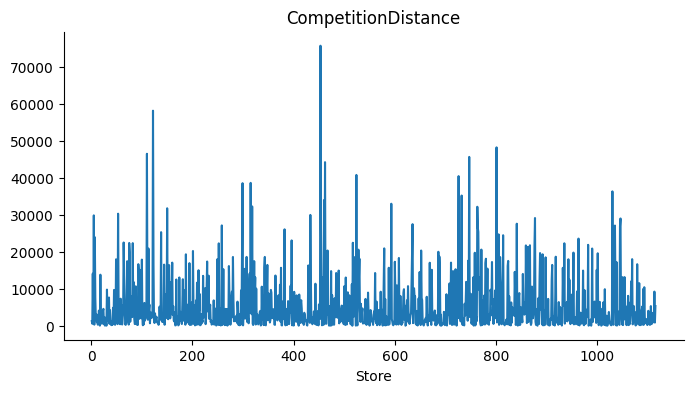

In [35]:
# ploting competiition Distance #
store_train['CompetitionDistance'].plot(kind='line', figsize=(8, 4), title='CompetitionDistance')
plt.gca().spines[['top', 'right']].set_visible(False)

In [36]:

#Overall Trend: The line plot shows how the distance to the nearest competitor varies across stores.
# Spikes (Peaks): These indicate stores that are far away from competitors—possibly in rural or less crowded areas.
# Dips (Valleys): These show stores that are very close to competition—likely in commercial hubs or dense city locations.
# Stores close to competitors might need aggressive marketing or better pricing to attract customers.


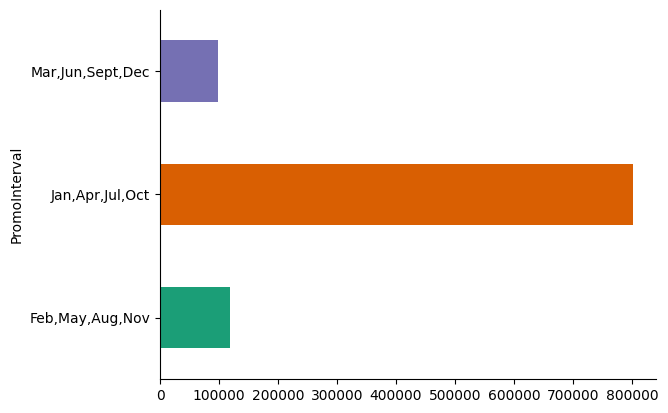

In [37]:
# promointerval #
store_train.groupby('PromoInterval').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [38]:
#  one PromoInterval dominates, it suggests a preferred promotional strategy among stores.
# stores likely use varied promotional periods based on business needs.



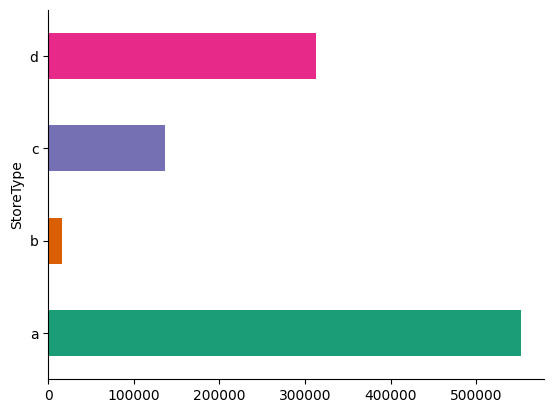

In [39]:

store_train.groupby('StoreType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

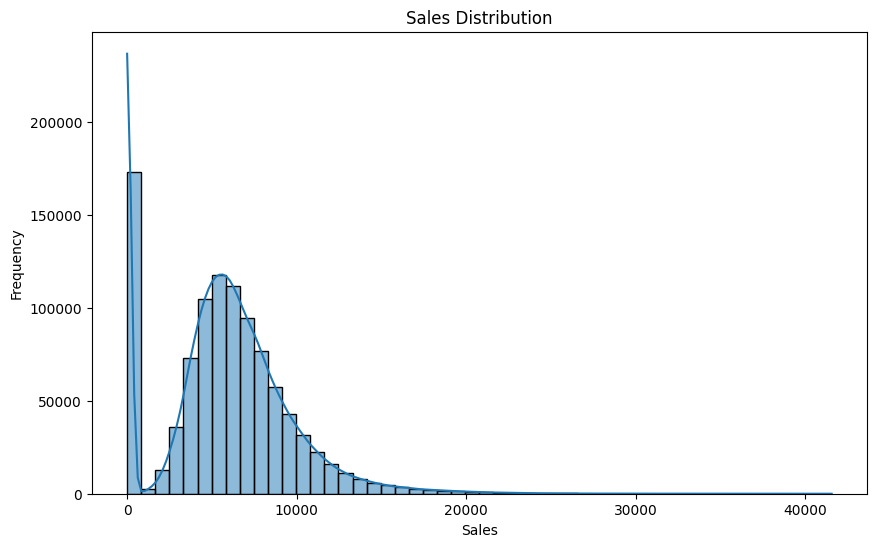

In [40]:
# Sales Distribution
plt.figure(figsize=(10,6))
sns.histplot(store_train['Sales'], bins=50, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


In [41]:
# most stores have low sales, strategies like discounts or marketing might be needed.
# few stores have very high sales, investigate what makes them successful—location, promotions, or product mix.
#the distribution shows multiple peaks, different store types or seasonal variations might be influencing sales.



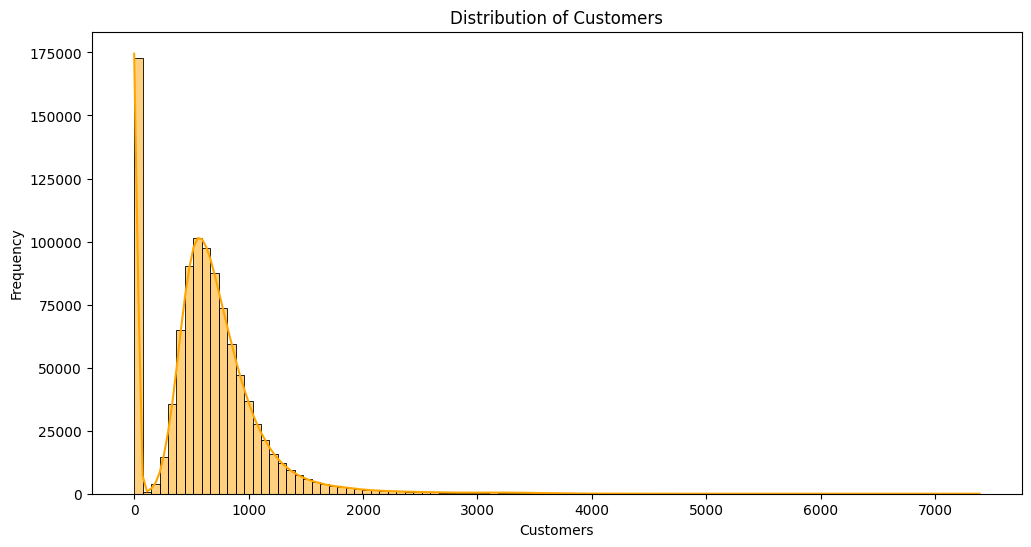

In [42]:
plt.figure(figsize=(12, 6))
sns.histplot(store_train['Customers'], bins=100, kde=True, color='orange')
plt.title("Distribution of Customers")
plt.xlabel("Customers")
plt.ylabel("Frequency")
plt.show()


In [43]:
# most stores have fewer customers, marketing strategies might be needed to drive foot traffic.
# few stores have high customer counts, understanding why they perform well can help improve other stores.
#  there’s high variance, store location, promotions, or other external factors could be influencing customer flow.


In [44]:
 #Correlation Between Sales and Customers #

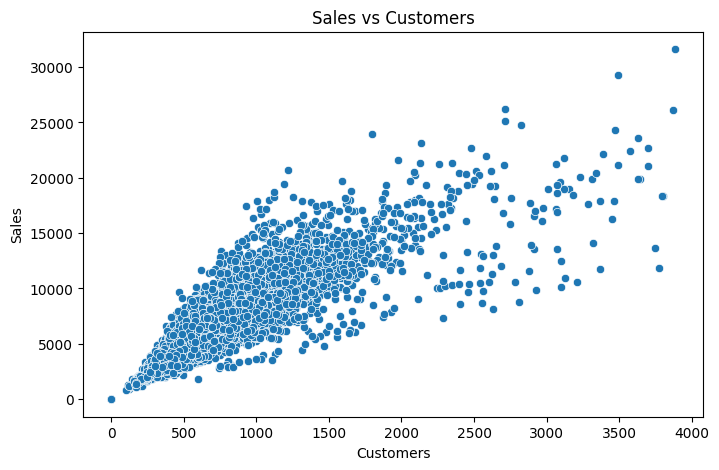

Correlation:
               Sales  Customers
Sales      1.000000   0.894711
Customers  0.894711   1.000000


In [45]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Customers', y='Sales', data=store_train.sample(10000))
plt.title('Sales vs Customers')
plt.show()

corr = store_train[['Sales', 'Customers']].corr()
print("Correlation:\n", corr)


In [46]:
# Sales Before, During & After Holidays #

In [47]:
# Mark holidays
store_train['BeforeHoliday'] = store_train['StateHoliday'].shift(-1).fillna('0') != '0'
store_train['AfterHoliday'] = store_train['StateHoliday'].shift(1).fillna('0') != '0'
store_train['Holiday'] = store_train['StateHoliday'] != '0'

# Grouping
holiday_sales = store_train.groupby(['Holiday'])['Sales'].mean()
before_sales = store_train[store_train['BeforeHoliday'] == True]['Sales'].mean()
after_sales = store_train[store_train['AfterHoliday'] == True]['Sales'].mean()

print(f"Sales on Holidays: {holiday_sales}")
print(f"Sales before Holiday: {before_sales}")
print(f"Sales after Holiday: {after_sales}")


Sales on Holidays: Holiday
False    5980.279717
True     4684.874237
Name: Sales, dtype: float64
Sales before Holiday: 5999.713573728427
Sales after Holiday: 5695.279828029681


In [48]:
 #Promo vs Sales #

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


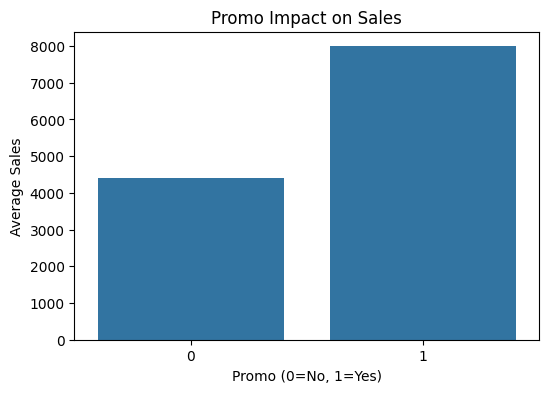

In [49]:
promo_sales = store_train.groupby(['Promo'])['Sales'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=promo_sales.index, y=promo_sales.values)
plt.title("Promo Impact on Sales")
plt.xlabel("Promo (0=No, 1=Yes)")
plt.ylabel("Average Sales")
plt.show()


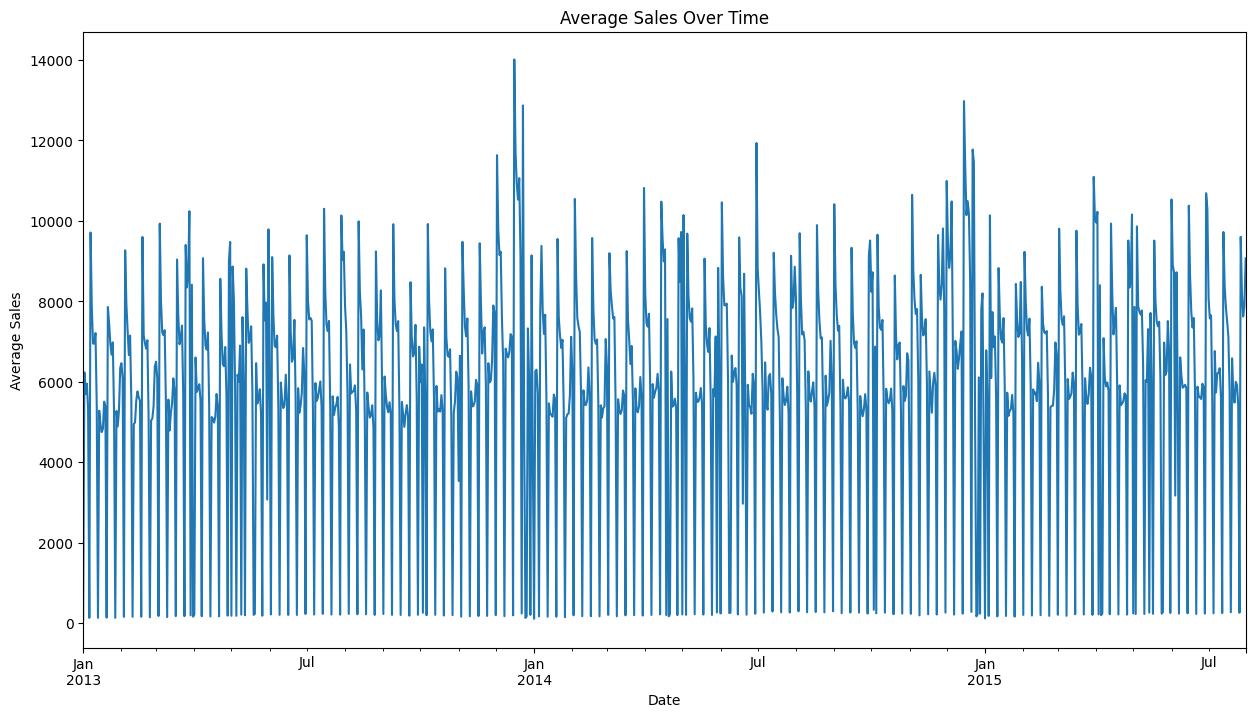

In [50]:
# Sales Over Time
store_train.groupby('Date')['Sales'].mean().plot(figsize=(15,8))
plt.title('Average Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.show()


In [51]:
# sales drop suddenly, investigate store operations, market conditions, or customer behavior.
# certain periods consistently show high sales, stores might leverage promotions around those timeframes.
# Understanding long-term trends helps in forecasting future sales and making informed business decisions.


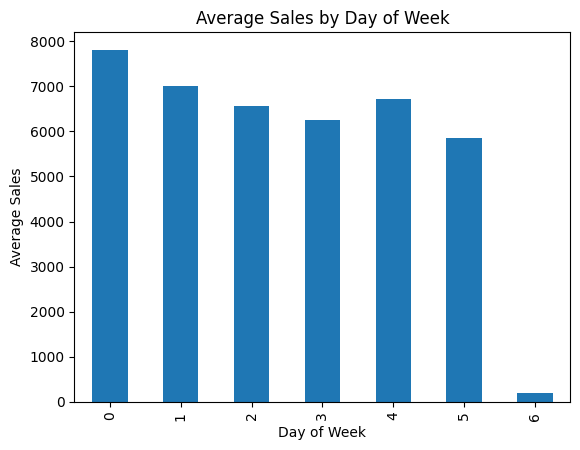

In [52]:


# Sales by Day of Week #
store_train.groupby('DayOfWeek')['Sales'].mean().plot(kind='bar')
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales')
plt.show()




In [53]:
#  weekends have higher sales, stores can optimize promotions and staffing for peak hours.
#  If weekdays struggle with sales, targeted discounts or events may help increase traffic.
# Understanding these patterns helps businesses plan inventory, staffing, and marketing strategies more efficiently


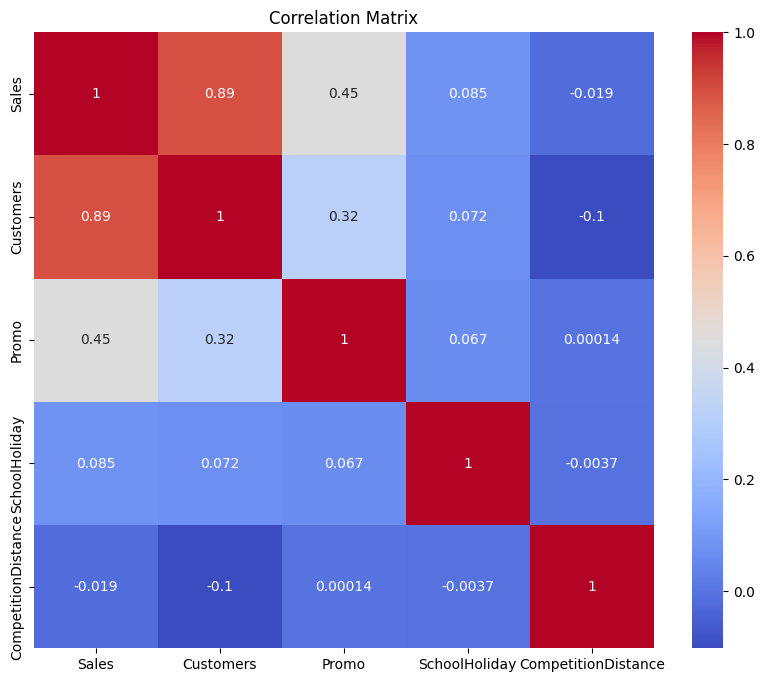

In [54]:

                                               # Correlation Heatmap #
corr_matrix = store_train[['Sales', 'Customers', 'Promo', 'SchoolHoliday', 'CompetitionDistance']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [55]:
# High correlation between Sales & Promo means promotional campaigns are working.
# Sales & CompetitionDistance has a strong negative correlation, stores farther from competitors might need fewer promotional efforts.
# Sales & SchoolHoliday correlation is weak, holiday periods may not influence shopping habits much.


In [56]:
print("🔍 Key Insights:")
print("- Sales and number of customers are positively correlated.")
print("- Promotions significantly increase average sales.")
print("- Sales drop on state holidays but increase after holidays.")
print("- Holiday effect is significant; before and after show higher sales.")
print("- Competition distance and assortment type should be explored further.")


🔍 Key Insights:
- Sales and number of customers are positively correlated.
- Promotions significantly increase average sales.
- Sales drop on state holidays but increase after holidays.
- Holiday effect is significant; before and after show higher sales.
- Competition distance and assortment type should be explored further.


In [57]:
 # upload Test Data and Merge with Store Data #

In [58]:
test_data= pd.read_csv('/content/drive/MyDrive/test.csv', index_col = 0)

In [59]:
test_data

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
Id,,,,,,,
1,1,4,2015-09-17,1.0,1,0,0
2,3,4,2015-09-17,1.0,1,0,0
3,7,4,2015-09-17,1.0,1,0,0
4,8,4,2015-09-17,1.0,1,0,0
5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...
41084,1111,6,2015-08-01,1.0,0,0,0
41085,1112,6,2015-08-01,1.0,0,0,0
41086,1113,6,2015-08-01,1.0,0,0,0


In [60]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41088 entries, 1 to 41088
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          41088 non-null  int64  
 1   DayOfWeek      41088 non-null  int64  
 2   Date           41088 non-null  object 
 3   Open           41077 non-null  float64
 4   Promo          41088 non-null  int64  
 5   StateHoliday   41088 non-null  object 
 6   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 2.5+ MB


In [61]:
test_data.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Open,11
Promo,0
StateHoliday,0
SchoolHoliday,0


In [62]:
#  fill missing categorical values with mode #
test_data.fillna(test_data.mode().iloc[0], inplace=True)

In [63]:
#  rows with at least 80% of Data #
test_data.dropna(thresh=0.8 * len(test_data.columns), inplace=True)

In [64]:
test_data.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [65]:

store_test = pd.merge(store_data, test_data,left_index=True, right_index=True, how='inner')

In [66]:
store_test

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",1,4,2015-09-17,1.0,1,0,0
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",3,4,2015-09-17,1.0,1,0,0
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7,4,2015-09-17,1.0,1,0,0
4,c,c,620.0,9.0,2009.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",8,4,2015-09-17,1.0,1,0,0
5,a,a,29910.0,4.0,2015.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",333,3,2015-09-16,1.0,1,0,0
1112,c,c,1880.0,4.0,2006.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",334,3,2015-09-16,1.0,1,0,0
1113,a,c,9260.0,9.0,2013.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",335,3,2015-09-16,1.0,1,0,0
1114,a,c,870.0,9.0,2013.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",336,3,2015-09-16,1.0,1,0,0


In [67]:
store_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1115 entries, 1 to 1115
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StoreType                  1115 non-null   object 
 1   Assortment                 1115 non-null   object 
 2   CompetitionDistance        1115 non-null   float64
 3   CompetitionOpenSinceMonth  1115 non-null   float64
 4   CompetitionOpenSinceYear   1115 non-null   float64
 5   Promo2                     1115 non-null   int64  
 6   Promo2SinceWeek            1115 non-null   float64
 7   Promo2SinceYear            1115 non-null   float64
 8   PromoInterval              1115 non-null   object 
 9   Store                      1115 non-null   int64  
 10  DayOfWeek                  1115 non-null   int64  
 11  Date                       1115 non-null   object 
 12  Open                       1115 non-null   float64
 13  Promo                      1115 non-null   int64  
 1

In [68]:
store_test.isnull().sum()

,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
PromoInterval,0
Store,0


In [69]:
# Save merged CSV
store_test.to_csv("store_test.csv", index=False)

In [70]:
import os
from google.colab import files

if not os.path.exists("store_test.csv"):
    files.download("store_test.csv")
else:
    print("File already downloaded.")

File already downloaded.


In [71]:
import pickle
from google.colab import drive

drive.mount('/content/drive')

# Save processed dataset
with open('/content/drive/MyDrive/EDA_Data.pkl', 'wb') as f:
    pickle.dump(store_train, f)

print("EDA data saved successfully!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
EDA data saved successfully!
